In [2]:
import numpy as np
from tic_env import TictactoeEnv, OptimalPlayer
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
env = TictactoeEnv() #To initialize the environment

In [4]:
Q = {}

action = {
    0: (0,0),
    1: (0,1),
    2: (0,2),
    3: (1,0),
    4: (1,1),
    5: (1,2),
    6: (2,0),
    7: (2,1),
    8: (2,2)
}

rev_action = {
    (0,0) :0,
    (0,1) :1,
    (0,2) :2,
    (1,0) :3,
    (1,1) :4,
    (1,2) :5,
    (2,0) :6,
    (2,1) :7,
    (2,2) :8
}

In [5]:
## Function for finding the best actions from Q table based on epsilon greedy policy with 0. epsilon
def best_action(state,act,Q_values):
    possible_actions = []
    local_q = 0
    str_state = str(state.flatten())
    for k in range(9):
        if state[act[k]] == 0:
            if  (str_state,k) in Q_values:
                possible_actions.append((k,Q_values[(str_state,k)]))
            else:
                Q_values[(str_state,k)] = 0
                possible_actions.append((k,0))
    mult_max = max(possible_actions,key=lambda item:item[1])
    max_actions = []
    for i in possible_actions:
        if i[1] == mult_max[1]:
            max_actions.append(i)
    
    return random.choice(max_actions)

In [ ]:
## Function for finding the best actions from Q table based on epsilon greedy policy 
def best_action_policy(state,act,Q_values,epsilon):
    possible_actions = []
    str_state = str(state.flatten())
    for k in range(9):
        if state[act[k]] == 0:
            if  (str_state,k) in Q_values:
                possible_actions.append((k,Q_values[(str_state,k)]))
            else:
                Q_values[(str_state,k)] = 0
                possible_actions.append((k,0))
    
    mult_max = max(possible_actions,key=lambda item:item[1])
    max_actions = []
    for i in possible_actions:
        if i[1] == mult_max[1]:
            max_actions.append(i)
    if epsilon == 0.:
        return random.choice(max_actions)
    else:
        random_number = random.randint(0, 9)
        if random_number >= epsilon*10:
            return random.choice(max_actions)
        else:
            return random.choice(possible_actions)


In [ ]:
##For having a epsilon that decays as the training goes on
def epsilon_fxn(n,n_star):
    return np.maximum(0.1,0.8*(1-(n/n_star)))

In [6]:
##Function to find M_opt and M_rand
## eps: the argument is the argument eps_opt for the env 
## and then the function runs 500 games and find wins by computer and wins by our agent
def number_wins(eps):    
      N_win = 0
      N_wino = 0
      draw = 0
      for games in range(500):

            env.reset()
            if games%2 == 0:
                  opt_player = OptimalPlayer(epsilon = eps, player = 'O')

            if games%2 == 1:
                  opt_player = OptimalPlayer(epsilon = eps, player = 'X')
                  grid, _, __ = env.observe()
                  comp_move = opt_player.act(grid)
                  env.step(comp_move)
      
            for rounds in range(5):
                  state_now = str(env.observe()[0].flatten())
                  #selecting the best action considering the present state
                  best_action1, _ = best_action(env.observe()[0],action,Q)
        
                  #make the move with that best action
                  env.step(best_action1)
                  grid, _, __ = env.observe()
        
                  if env.observe()[1] == True:
                        if str(env.winner) == 'X' and games%2 == 0:
                              N_win = N_win+1
                        elif str(env.winner) == 'O' and games%2 == 0:
                              N_wino = N_wino+1
                        elif str(env.winner) == 'O' and games%2 == 1:
                              N_win = N_win+1
                        elif str(env.winner) == 'X' and games%2 == 1:
                              N_wino = N_wino+1
                        else:
                              draw = draw+1
                        break
        
                  #Now the computer plays (for a fair game ahaha)
                  comp_move = opt_player.act(grid)
                  env.step(comp_move)

                  if env.observe()[1] == True:
                        if str(env.winner) == 'X' and games%2 == 0:
                              N_win = N_win+1
                        elif str(env.winner) == 'O' and games%2 == 0:
                              N_wino = N_wino+1
                        elif str(env.winner) == 'O' and games%2 == 1:
                              N_win = N_win+1
                        elif str(env.winner) == 'X' and games%2 == 1:
                              N_wino = N_wino+1
                        else:
                              draw = draw+1
                        break

      return N_win, N_wino


# Question 2 and 3

In [53]:
##List to store variables we would like to see how they vary with the training
M_opt = [[],[],[],[],[],[]]
M_rand = [[],[],[],[],[],[]]
avg_rew = [[],[],[],[],[],[]]

n_star_list = [1, 1000, 5000, 10000, 20000, 40000]

rew = 0
for z in range(6):
  print(z)
  ##Initialising a new Q dictionary
  Q = {}
  for games in range(20000):
  
    env.reset()

    #updating the required lists after each 250 games are played
    if games%250 ==0:
        rew = rew/250
        avg_rew[z].append(rew)
        N_me, N_comp = number_wins(0.)
        M_opt[z].append((N_me-N_comp)/500)
        env.reset()
        N_me, N_comp = number_wins(1.)
        M_rand[z].append((N_me-N_comp)/500)
        env.reset()
        rew = 0

    ####To keep the number of times we played first and the times computer played first equal
    if games%2 == 0:
        player1 = "X"
        player2 = "O"
        opt_player = OptimalPlayer(epsilon = 0.5, player = player2)
    if games%2 == 1:
        player1 = "O"
        player2 = "X"
        opt_player = OptimalPlayer(epsilon = 0.5, player = player2)
        grid, _, __ = env.observe()
        comp_move = opt_player.act(grid)
        env.step(comp_move)


    for rounds in range(5):

        #I play
        state_now = str(env.observe()[0].flatten())
        #selecting the best action considering the present state
        best_action1, _ = best_action_policy(env.observe()[0],action,Q, epsilon_fxn(games,n_star_list[z]))
        
        #make the move with that best action
        env.step(best_action1)

        #Now the computer plays (for a fair game ahaha)
        grid, _, __ = env.observe()
        
        if env.observe()[1] == True:
              Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1))
              rew += env.reward(player=player1)
              break
        
        
        comp_now = str(env.observe()[0].flatten())
        comp_move = opt_player.act(grid)
        env.step(comp_move)

        if env.observe()[1] == True:
              Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1))
              rew += env.reward(player=player1)
              break

        #Gather information about the state the game is in after the computer played
        future_state = str(env.observe()[0].flatten())
        fut_best_action, _ = best_action_policy(env.observe()[0],action,Q, epsilon_fxn(games,n_star_list[z]))
   
        if env.observe()[1] == True:
            Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1) + 0.99*Q[(future_state,fut_best_action)] - Q[(state_now,best_action1)])
            rew += env.reward(player=player1)
            break

        else:
              Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1) + 0.99*Q[(future_state,fut_best_action)] - Q[(state_now,best_action1)])
              


0
1
2
3
4
5


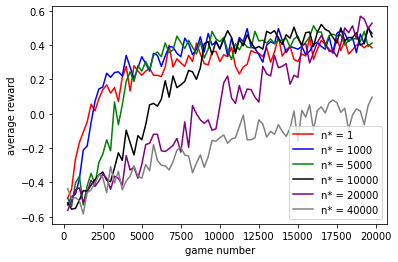

In [58]:
game_number = []
for i in range(80):
    game_number.append(250*i)

plt.plot(game_number[1:],avg_rew[0][1:],color='r',label='n* = 1')
plt.plot(game_number[1:],avg_rew[1][1:],color='b',label='n* = 1000')
plt.plot(game_number[1:],avg_rew[2][1:],color='g',label='n* = 5000')
plt.plot(game_number[1:],avg_rew[3][1:],color='black',label='n* = 10000')
plt.plot(game_number[1:],avg_rew[4][1:],color='purple',label='n* = 20000')
plt.plot(game_number[1:],avg_rew[5][1:],color='gray',label='n* = 40000')

plt.ylabel("average reward")
plt.xlabel("game number")
plt.legend()
plt.savefig('Ques2.png')
plt.savefig('Ques2.pdf')
plt.show()

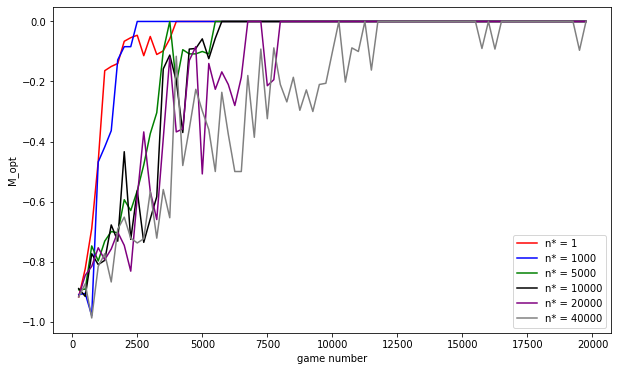

In [62]:
game_number = []
for i in range(80):
    game_number.append(250*i)
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(game_number[1:],M_opt[0][1:],color='r',label='n* = 1')
plt.plot(game_number[1:],M_opt[1][1:],color='b',label='n* = 1000')
plt.plot(game_number[1:],M_opt[2][1:],color='g',label='n* = 5000')
plt.plot(game_number[1:],M_opt[3][1:],color='black',label='n* = 10000')
plt.plot(game_number[1:],M_opt[4][1:],color='purple',label='n* = 20000')
plt.plot(game_number[1:],M_opt[5][1:],color='gray',label='n* = 40000')

plt.ylabel("M_opt")
plt.xlabel("game number")
plt.legend()
plt.savefig('Ques3a.png')
plt.savefig('Ques3a.pdf')
plt.show()

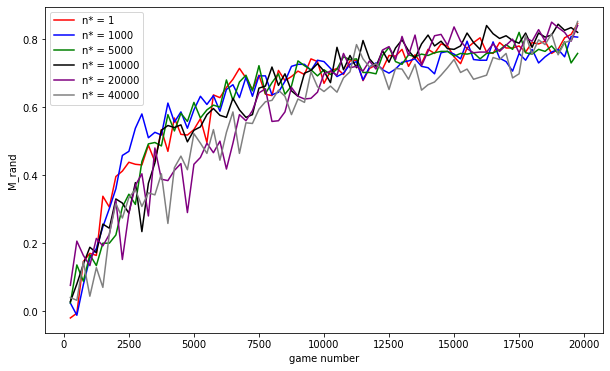

In [63]:
game_number = []
for i in range(80):
    game_number.append(250*i)
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(game_number[1:],M_rand[0][1:],color='r',label='n* = 1')
plt.plot(game_number[1:],M_rand[1][1:],color='b',label='n* = 1000')
plt.plot(game_number[1:],M_rand[2][1:],color='g',label='n* = 5000')
plt.plot(game_number[1:],M_rand[3][1:],color='black',label='n* = 10000')
plt.plot(game_number[1:],M_rand[4][1:],color='purple',label='n* = 20000')
plt.plot(game_number[1:],M_rand[5][1:],color='gray',label='n* = 40000')

plt.ylabel("M_rand")
plt.xlabel("game number")
plt.legend()
plt.savefig('Ques3b.png')
plt.savefig('Ques3b.pdf')
plt.show()

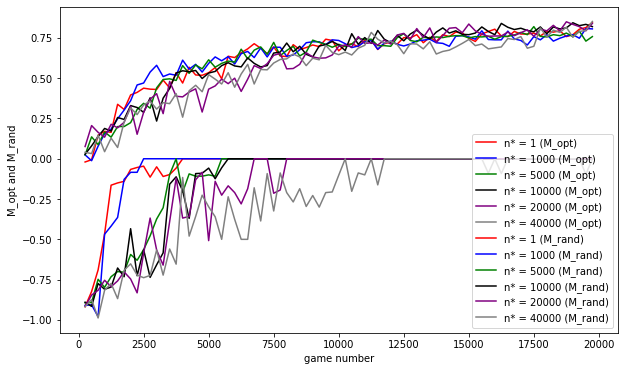

In [64]:
game_number = []
for i in range(80):
    game_number.append(250*i)
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(game_number[1:],M_opt[0][1:],color='r',label='n* = 1 (M_opt)')
plt.plot(game_number[1:],M_opt[1][1:],color='b',label='n* = 1000 (M_opt)')
plt.plot(game_number[1:],M_opt[2][1:],color='g',label='n* = 5000 (M_opt)')
plt.plot(game_number[1:],M_opt[3][1:],color='black',label='n* = 10000 (M_opt)')
plt.plot(game_number[1:],M_opt[4][1:],color='purple',label='n* = 20000 (M_opt)')
plt.plot(game_number[1:],M_opt[5][1:],color='gray',label='n* = 40000 (M_opt)')
plt.plot(game_number[1:],M_rand[0][1:],color='r',label='n* = 1 (M_rand)')
plt.plot(game_number[1:],M_rand[1][1:],color='b',label='n* = 1000 (M_rand)')
plt.plot(game_number[1:],M_rand[2][1:],color='g',label='n* = 5000 (M_rand)')
plt.plot(game_number[1:],M_rand[3][1:],color='black',label='n* = 10000 (M_rand)')
plt.plot(game_number[1:],M_rand[4][1:],color='purple',label='n* = 20000 (M_rand)')
plt.plot(game_number[1:],M_rand[5][1:],color='gray',label='n* = 40000 (M_rand)')

plt.ylabel("M_opt and M_rand")
plt.xlabel("game number")
plt.legend()
plt.savefig('Ques3c.png')
plt.savefig('Ques3c.pdf')
plt.show()

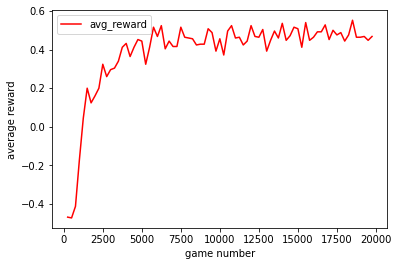

In [46]:
game_number = []
for i in range(80):
    game_number.append(250*i)

plt.plot(game_number[1:],avg_rew[1:],color='r',label='avg_reward')
plt.ylabel("average reward")
plt.xlabel("game number")
plt.legend()
plt.savefig('Ques1.png')
plt.savefig('Ques1.pdf')
plt.show()

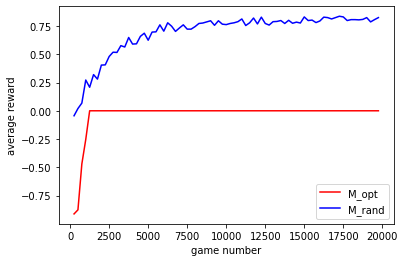

In [48]:
game_number = []
for i in range(80):
    game_number.append(250*i)

plt.plot(game_number[1:],M_opt[1:],color='r',label='M_opt')
plt.plot(game_number[1:],M_rand[1:],color='b',label='M_rand')
plt.ylabel("average reward")
plt.xlabel("game number")
plt.legend()
plt.savefig('Ques3.png')
plt.savefig('Ques3.pdf')
plt.show()

# Question 4

In [65]:
##List to store variables we would like to see how they vary with the training
M_opt = [[],[],[],[],[],[]]
M_rand = [[],[],[],[],[],[]]
avg_rew = [[],[],[],[],[],[]]

###We will train for this part with playing against different levels of player 
e_opt = [0., 0.2, 0.4, 0.6, 0.8, 1.]

rew = 0
for z in range(6):
  print(z)
  Q = {}
  for games in range(20000):
  
    env.reset()

    
    if games%250 ==0:
        N_me, N_comp = number_wins(0.)
        M_opt[z].append((N_me-N_comp)/500)
        env.reset()
        N_me, N_comp = number_wins(1.)
        M_rand[z].append((N_me-N_comp)/500)
        env.reset()

    if games%2 == 0:
        player1 = "X"
        player2 = "O"
        opt_player = OptimalPlayer(epsilon = e_opt[z], player = player2)
    if games%2 == 1:
        player1 = "O"
        player2 = "X"
        opt_player = OptimalPlayer(epsilon = e_opt[z], player = player2)
        grid, _, __ = env.observe()
        comp_move = opt_player.act(grid)
        env.step(comp_move)


    for rounds in range(5):

        #I play
        state_now = str(env.observe()[0].flatten())
        #selecting the best action considering the present state
        best_action1, _ = best_action_policy(env.observe()[0],action,Q, epsilon_fxn(games,10000))
        
        #make the move with that best action
        env.step(best_action1)

        #Now the computer plays (for a fair game ahaha)
        grid, _, __ = env.observe()
        
        if env.observe()[1] == True:
              Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1))
              break
        
        ##The optimal player plays now
        comp_now = str(env.observe()[0].flatten())
        comp_move = opt_player.act(grid)
        env.step(comp_move)

        if env.observe()[1] == True:
              Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1))
              break

        #Gather information about the state the game is in after the computer played
        future_state = str(env.observe()[0].flatten())
        fut_best_action, _ = best_action_policy(env.observe()[0],action,Q, epsilon_fxn(games,10000))
   
        if env.observe()[1] == True:
            Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1) + 0.99*Q[(future_state,fut_best_action)] - Q[(state_now,best_action1)])
            break

        else:
              Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1) + 0.99*Q[(future_state,fut_best_action)] - Q[(state_now,best_action1)])
              


0
1
2
3
4
5


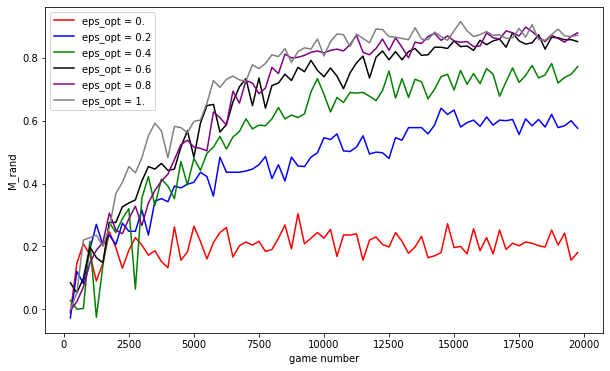

In [68]:
game_number = []
for i in range(80):
    game_number.append(250*i)
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(game_number[1:],M_rand[0][1:],color='r',label='eps_opt = 0.')
plt.plot(game_number[1:],M_rand[1][1:],color='b',label='eps_opt = 0.2')
plt.plot(game_number[1:],M_rand[2][1:],color='g',label='eps_opt = 0.4')
plt.plot(game_number[1:],M_rand[3][1:],color='black',label='eps_opt = 0.6')
plt.plot(game_number[1:],M_rand[4][1:],color='purple',label='eps_opt = 0.8')
plt.plot(game_number[1:],M_rand[5][1:],color='gray',label='eps_opt = 1.')

plt.ylabel("M_rand")
plt.xlabel("game number")
plt.legend()
plt.savefig('Ques4b.png')
plt.savefig('Ques4b.pdf')
plt.show()

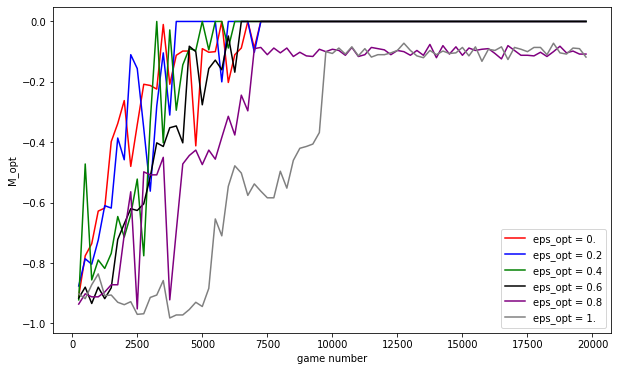

In [69]:
game_number = []
for i in range(80):
    game_number.append(250*i)
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(game_number[1:],M_opt[0][1:],color='r',label='eps_opt = 0.')
plt.plot(game_number[1:],M_opt[1][1:],color='b',label='eps_opt = 0.2')
plt.plot(game_number[1:],M_opt[2][1:],color='g',label='eps_opt = 0.4')
plt.plot(game_number[1:],M_opt[3][1:],color='black',label='eps_opt = 0.6')
plt.plot(game_number[1:],M_opt[4][1:],color='purple',label='eps_opt = 0.8')
plt.plot(game_number[1:],M_opt[5][1:],color='gray',label='eps_opt = 1.')

plt.ylabel("M_opt")
plt.xlabel("game number")
plt.legend()
plt.savefig('Ques4a.png')
plt.savefig('Ques4a.pdf')
plt.show()

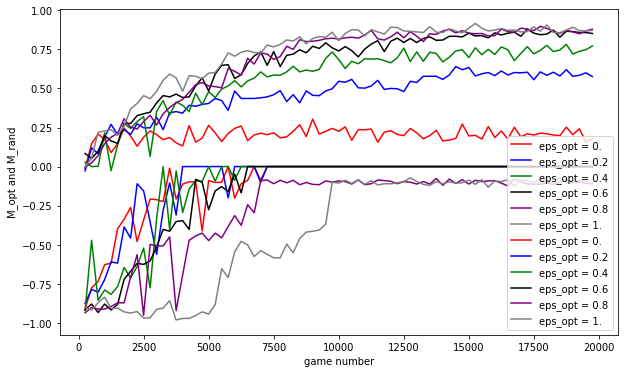

In [70]:
game_number = []
for i in range(80):
    game_number.append(250*i)
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(game_number[1:],M_opt[0][1:],color='r',label='eps_opt = 0.')
plt.plot(game_number[1:],M_opt[1][1:],color='b',label='eps_opt = 0.2')
plt.plot(game_number[1:],M_opt[2][1:],color='g',label='eps_opt = 0.4')
plt.plot(game_number[1:],M_opt[3][1:],color='black',label='eps_opt = 0.6')
plt.plot(game_number[1:],M_opt[4][1:],color='purple',label='eps_opt = 0.8')
plt.plot(game_number[1:],M_opt[5][1:],color='gray',label='eps_opt = 1.')
plt.plot(game_number[1:],M_rand[0][1:],color='r',label='eps_opt = 0.')
plt.plot(game_number[1:],M_rand[1][1:],color='b',label='eps_opt = 0.2')
plt.plot(game_number[1:],M_rand[2][1:],color='g',label='eps_opt = 0.4')
plt.plot(game_number[1:],M_rand[3][1:],color='black',label='eps_opt = 0.6')
plt.plot(game_number[1:],M_rand[4][1:],color='purple',label='eps_opt = 0.8')
plt.plot(game_number[1:],M_rand[5][1:],color='gray',label='eps_opt = 1.')

plt.ylabel("M_opt and M_rand")
plt.xlabel("game number")
plt.legend()
plt.savefig('Ques4c.png')
plt.savefig('Ques4c.pdf')
plt.show()

In [73]:
np.max(M_opt), np.max(M_rand)

(0.0, 0.916)

# Q Learning by playing against ourselves 

In [74]:
Q = {}

action = {
    0: (0,0),
    1: (0,1),
    2: (0,2),
    3: (1,0),
    4: (1,1),
    5: (1,2),
    6: (2,0),
    7: (2,1),
    8: (2,2)
}

rev_action = {
    (0,0) :0,
    (0,1) :1,
    (0,2) :2,
    (1,0) :3,
    (1,1) :4,
    (1,2) :5,
    (2,0) :6,
    (2,1) :7,
    (2,2) :8
}

# Question 7

In [76]:
##List to store variables we would like to see how they vary with the training
M_opt = [[],[],[],[],[]]
M_rand = [[],[],[],[],[]]
rew = [[],[],[],[],[]]

## We try to learn the agent using different epsilon greedy exploring values and see which one is the best
epsilon_list = [0.,0.2,0.5,0.7,0.9]

for z in range(5):
    ##Initialising an empty Q dictionary for every new esploration policy
    Q = {}
    print(z)

    for games in range(20000):
        env.reset()

        if games%250 == 0:
            N_me, N_comp = number_wins(0.)
            M_opt[z].append((N_me-N_comp)/500)
            print("z",z)
            print("game_number",games)
            print("M_opt",N_me, N_comp)
            env.reset()
            N_me, N_comp = number_wins(1.)
            M_rand[z].append((N_me-N_comp)/500)
            print("M_rand",N_me, N_comp)
            env.reset()

        if games%2 == 0:
            player1 = "X"
            player2 = "O"
        if games%2 == 1:
            player1 = "O"
            player2 = "X"
            state101 = str(env.observe()[0].flatten())
            best_action101, _ = best_action_policy(env.observe()[0],action,Q,epsilon_list[z])
            env.step(best_action101)
            

        for rounds in range(5):

            #I play
            state_now = str(env.observe()[0].flatten())
            #selecting the best action considering the present state
            best_action1, _ = best_action_policy(env.observe()[0],action,Q,epsilon_list[z])
            
            #make the move with that best action
            env.step(best_action1)

            grid, _, __ = env.observe()
            
            if env.observe()[1] == True:
                rew.append(env.reward(player=player1))
                Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1))
                break
            
            ##Now here we play with our policy and not the optimal player
            state_now2 = str(env.observe()[0].flatten())
            our_move2, _ = best_action_policy(env.observe()[0],action,Q,epsilon_list[z])
            env.step(our_move2)

            if env.observe()[1] == True:
                rew.append(env.reward(player=player1))
                Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1))
                break

            #Gather information about the state the game is in after the computer played
            future_state = str(env.observe()[0].flatten())
            fut_best_action, _ = best_action_policy(env.observe()[0],action,Q,0.)
            if env.observe()[1] == True:
                Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1) + 0.99*Q[(future_state,fut_best_action)] - Q[(state_now,best_action1)])
                break

            else:
                Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1) + 0.99*Q[(future_state,fut_best_action)] - Q[(state_now,best_action1)])



0
z 0
game_number 0
M_opt 0 467
M_rand 223 214
z 0
game_number 250
M_opt 0 471
M_rand 209 231
z 0
game_number 500
M_opt 0 468
M_rand 245 192
z 0
game_number 750
M_opt 0 468
M_rand 266 182
z 0
game_number 1000
M_opt 0 239
M_rand 271 177
z 0
game_number 1250
M_opt 0 233
M_rand 270 172
z 0
game_number 1500
M_opt 0 232
M_rand 265 183
z 0
game_number 1750
M_opt 0 231
M_rand 260 181
z 0
game_number 2000
M_opt 0 232
M_rand 260 172
z 0
game_number 2250
M_opt 0 241
M_rand 281 150
z 0
game_number 2500
M_opt 0 237
M_rand 277 171
z 0
game_number 2750
M_opt 0 237
M_rand 281 159
z 0
game_number 3000
M_opt 0 231
M_rand 267 172
z 0
game_number 3250
M_opt 0 240
M_rand 263 178
z 0
game_number 3500
M_opt 0 236
M_rand 299 142
z 0
game_number 3750
M_opt 0 236
M_rand 280 172
z 0
game_number 4000
M_opt 0 231
M_rand 284 161
z 0
game_number 4250
M_opt 0 238
M_rand 267 183
z 0
game_number 4500
M_opt 0 235
M_rand 275 178
z 0
game_number 4750
M_opt 0 232
M_rand 255 173
z 0
game_number 5000
M_opt 0 234
M_rand 285 

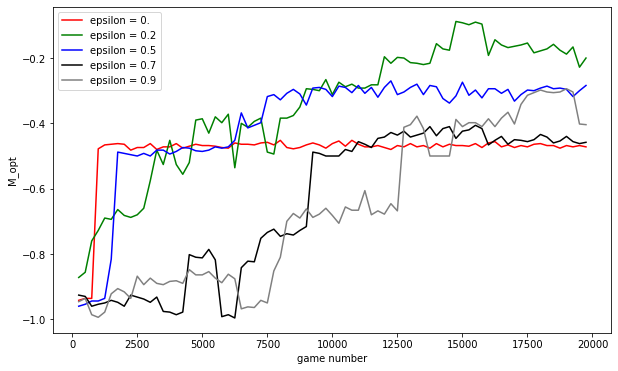

In [80]:
game_number = []
for i in range(80):
    game_number.append(250*i)
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(game_number[1:], M_opt[0][1:],color='r',label='epsilon = 0.')
plt.plot(game_number[1:], M_opt[1][1:],color='g',label='epsilon = 0.2')
plt.plot(game_number[1:], M_opt[2][1:],color='b',label='epsilon = 0.5')
plt.plot(game_number[1:], M_opt[3][1:],color='black',label='epsilon = 0.7')
plt.plot(game_number[1:], M_opt[4][1:],color='gray',label='epsilon = 0.9')
#plt.plot(game_number[1:], M_opt[5][1:],color='pink',label='epsilon = 0.9')
plt.ylabel("M_opt")
plt.xlabel("game number")
plt.legend()
plt.savefig('Ques7a.png')
plt.savefig('Ques7a.pdf')
plt.show()

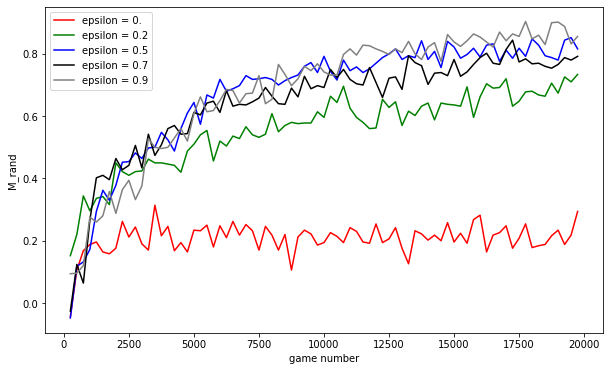

In [81]:
game_number = []
for i in range(80):
    game_number.append(250*i)
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(game_number[1:], M_rand[0][1:],color='r',label='epsilon = 0.')
plt.plot(game_number[1:], M_rand[1][1:],color='g',label='epsilon = 0.2')
plt.plot(game_number[1:], M_rand[2][1:],color='b',label='epsilon = 0.5')
plt.plot(game_number[1:], M_rand[3][1:],color='black',label='epsilon = 0.7')
plt.plot(game_number[1:], M_rand[4][1:],color='gray',label='epsilon = 0.9')
#plt.plot(game_number[1:], M_opt[5][1:],color='pink',label='epsilon = 0.9')
plt.ylabel("M_rand")
plt.xlabel("game number")
plt.legend()
plt.savefig('Ques7b.png')
plt.savefig('Ques7b.pdf')
plt.show()

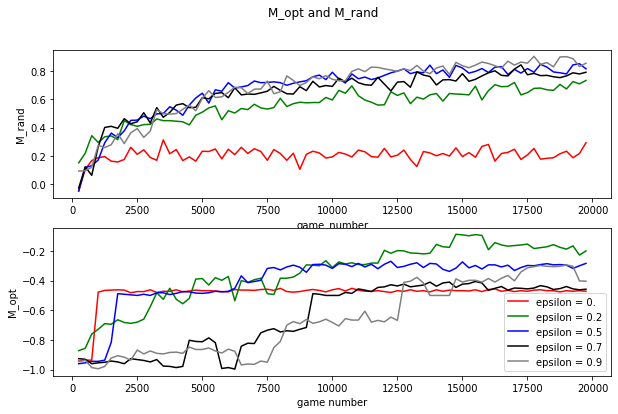

In [82]:
game_number = []
for i in range(80):
    game_number.append(250*i)

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('M_opt and M_rand')

ax1.plot(game_number[1:], M_rand[0][1:],color='r',label='epsilon = 0.')
ax1.plot(game_number[1:], M_rand[1][1:],color='g',label='epsilon = 0.2')
ax1.plot(game_number[1:], M_rand[2][1:],color='b',label='epsilon = 0.5')
ax1.plot(game_number[1:], M_rand[3][1:],color='black',label='epsilon = 0.7')
ax1.plot(game_number[1:], M_rand[4][1:],color='gray',label='epsilon = 0.9')
#ax1.plot(game_number[1:], M_rand5[1:],color='pink',label='n* = 40000')

ax2.plot(game_number[1:], M_opt[0][1:],color='r',label='epsilon = 0.')
ax2.plot(game_number[1:], M_opt[1][1:],color='g',label='epsilon = 0.2')
ax2.plot(game_number[1:], M_opt[2][1:],color='b',label='epsilon = 0.5')
ax2.plot(game_number[1:], M_opt[3][1:],color='black',label='epsilon = 0.7')
ax2.plot(game_number[1:], M_opt[4][1:],color='gray',label='epsilon = 0.9')
#ax2.plot(game_number[1:], M_opt5[1:],color='pink',label='n* = 40000')


#ax1.plot(game_number[1:],average_reward[1:],color='r',label='average_reward')
#ax2.plot(game_number[1:],average_loss[1:], color="b",label="average_loss")

ax1.set(xlabel='game_number', ylabel='M_rand')
ax2.set(xlabel='game_number', ylabel='M_opt')

plt.xlabel("game number")
plt.legend()
plt.savefig('Ques7c.png')
plt.savefig('Ques7c.pdf')
plt.show()

In [84]:
np.max(M_opt), np.max(M_rand)

(-0.088, 0.904)

# Question 8

In [ ]:
##List to store variables we would like to see how they vary with the training
M_opt = [[],[],[],[],[]]
M_rand = [[],[],[],[],[]]
rew = [[],[],[],[],[]]


n_star_list = [1, 1000, 5000, 10000, 20000, 40000]

for z in range(6):

    Q = {}
    print(z)

    for games in range(20000):
        env.reset()

        if games%250 == 0:
            N_me, N_comp = number_wins(0.)
            M_opt[z].append((N_me-N_comp)/500)
            print("z",z)
            print("game_number",games)
            print("M_opt",N_me, N_comp)
            env.reset()
            N_me, N_comp = number_wins(1.)
            M_rand[z].append((N_me-N_comp)/500)
            print("M_rand",N_me, N_comp)
            env.reset()

        if games%2 == 0:
            player1 = "X"
            player2 = "O"
        if games%2 == 1:
            player1 = "O"
            player2 = "X"
            state101 = str(env.observe()[0].flatten())
            best_action101, _ = best_action_policy(env.observe()[0],action,Q,epsilon_fxn(games,n_star_list[z]))
            env.step(best_action101)
            

        for rounds in range(5):

            #I play
            state_now = str(env.observe()[0].flatten())
            #selecting the best action considering the present state
            best_action1, _ = best_action_policy(env.observe()[0],action,Q,epsilon_fxn(games,n_star_list[z]))
            
            #make the move with that best action
            env.step(best_action1)

            grid, _, __ = env.observe()
            
            if env.observe()[1] == True:
                ###Updating Q-values
                rew.append(env.reward(player=player1))
                Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1))
                break
            
            
            state_now2 = str(env.observe()[0].flatten())
            our_move2, _ = best_action_policy(env.observe()[0],action,Q,epsilon_fxn(games,n_star_list[z]))
            env.step(our_move2)

            if env.observe()[1] == True:
                ###Updating Q-values
                rew.append(env.reward(player=player1))
                Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1))
                break

            #Gather information about the state the game is in after the computer played
            future_state = str(env.observe()[0].flatten())
            fut_best_action, _ = best_action_policy(env.observe()[0],action,Q,0.)
            if env.observe()[1] == True:
                ###Updating Q-values
                Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1) + 0.99*Q[(future_state,fut_best_action)] - Q[(state_now,best_action1)])
                break

            else:
                ###Updating Q-values
                Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1) + 0.99*Q[(future_state,fut_best_action)] - Q[(state_now,best_action1)])



# Question 9

### Train with best n* and the see the predictions via heatmap

In [12]:
M_opt = []
M_rand = []
for z in range(1):

    Q = {}
    print(z)

    for games in range(20000):
        env.reset()

        if games%1000 == 0:
            N_me, N_comp = number_wins(0.)
            M_opt.append((N_me-N_comp)/500)
            print("z",z)
            print("game_number",games)
            print("M_opt",N_me, N_comp)
            env.reset()
            N_me, N_comp = number_wins(1.)
            M_rand.append((N_me-N_comp)/500)
            print("M_rand",N_me, N_comp)
            env.reset()

        if games%2 == 0:
            player1 = "X"
            player2 = "O"
        if games%2 == 1:
            player1 = "O"
            player2 = "X"
            state101 = str(env.observe()[0].flatten())
            best_action101, _ = best_action_policy(env.observe()[0],action,Q,epsilon_fxn(games,20000))
            env.step(best_action101)
            

        for rounds in range(5):

            #I play
            state_now = str(env.observe()[0].flatten())
            #selecting the best action considering the present state
            best_action1, _ = best_action_policy(env.observe()[0],action,Q,epsilon_fxn(games,20000))
            
            #make the move with that best action
            env.step(best_action1)

            #Now the computer plays (for a fair game ahaha)
            grid, _, __ = env.observe()
            
            if env.observe()[1] == True:
                Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1))
                break
            
            
            state_now2 = str(env.observe()[0].flatten())
            our_move2, _ = best_action_policy(env.observe()[0],action,Q,epsilon_fxn(games,20000))
            env.step(our_move2)

            if env.observe()[1] == True:
                Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1))
                break

            #Gather information about the state the game is in after the computer played
            future_state = str(env.observe()[0].flatten())
            fut_best_action, _ = best_action_policy(env.observe()[0],action,Q,0.)
            if env.observe()[1] == True:
                Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1) + 0.99*Q[(future_state,fut_best_action)] - Q[(state_now,best_action1)])
                break

            else:
                Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1) + 0.99*Q[(future_state,fut_best_action)] - Q[(state_now,best_action1)])



0
z 0
game_number 0
M_opt 0 478
M_rand 216 226
z 0
game_number 1000
M_opt 0 468
M_rand 280 174
z 0
game_number 2000
M_opt 0 477
M_rand 348 115
z 0
game_number 3000
M_opt 0 459
M_rand 368 107
z 0
game_number 4000
M_opt 0 375
M_rand 382 89
z 0
game_number 5000
M_opt 0 347
M_rand 378 90
z 0
game_number 6000
M_opt 0 238
M_rand 393 70
z 0
game_number 7000
M_opt 0 265
M_rand 408 50
z 0
game_number 8000
M_opt 0 251
M_rand 413 49
z 0
game_number 9000
M_opt 0 247
M_rand 420 47
z 0
game_number 10000
M_opt 0 199
M_rand 417 35
z 0
game_number 11000
M_opt 0 160
M_rand 421 49
z 0
game_number 12000
M_opt 0 106
M_rand 432 31
z 0
game_number 13000
M_opt 0 90
M_rand 422 50
z 0
game_number 14000
M_opt 0 138
M_rand 441 32
z 0
game_number 15000
M_opt 0 126
M_rand 438 30
z 0
game_number 16000
M_opt 0 83
M_rand 435 24
z 0
game_number 17000
M_opt 0 72
M_rand 426 29
z 0
game_number 18000
M_opt 0 72
M_rand 427 38
z 0
game_number 19000
M_opt 0 64
M_rand 447 20


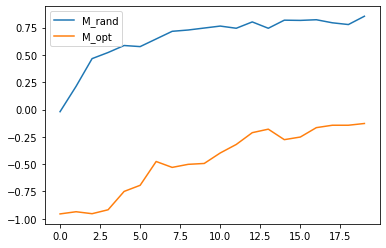

In [13]:
plt.plot(M_rand,label="M_rand")
plt.plot(M_opt,label="M_opt")
plt.legend()
plt.show()

#### State1 preparation

In [15]:
##Preparing a state to see what our network predicts

env.reset()
env.step(0)
env.step(2)
env.step(4)
env.step(5)

env.render()

|X - O|
|- X O|
|- - -|



In [16]:
#getting matrix for heatmap via the Q-values for different actions

state1 = str(env.observe()[0].flatten())
data_heat = np.zeros((3,3))
for i in range(9):
    if (state1,i) in Q:
        data_heat[action[i]] = Q[(state1,i)]
    else:
        data_heat[action[i]] = 0

data_heat

array([[ 0.        , -0.21117887,  0.        ],
       [-0.445     ,  0.        ,  0.        ],
       [-0.41072375, -0.38743265,  4.65      ]])

|X - O|
|- X O|
|- - -|



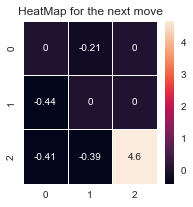

In [20]:
##showing the heatmap

env.render()
plt.style.use("seaborn")

plt.figure(figsize=(3,3))
heat_map = sns.heatmap( data_heat, linewidth = 1 , annot = True)
plt.title( "HeatMap for the next move" )
plt.show()

### State 2 preparation
repeating the steps done above for other two states


In [33]:
env.reset()
env.step(0)
env.step(2)
env.step(4)

env.render()

|X - O|
|- X -|
|- - -|



In [34]:
state2 = str(env.observe()[0].flatten())
data_heat = np.zeros((3,3))
for i in range(9):
    if (state2,i) in Q:
        data_heat[action[i]] = Q[(state2,i)]
    else:
        data_heat[action[i]] = 0

data_heat

array([[ 0.        , -3.25864401,  0.        ],
       [-3.80761214,  0.        , -3.13179382],
       [-3.11117618, -3.56785966,  0.26868846]])

|X - O|
|- X -|
|- - -|



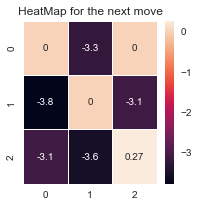

In [35]:
env.render()
plt.style.use("seaborn")

plt.figure(figsize=(3,3))
heat_map = sns.heatmap( data_heat, linewidth = 1 , annot = True)
plt.title( "HeatMap for the next move" )
plt.show()

### State 3 preparation

In [40]:
env.reset()
env.step(0)
env.step(2)
env.step(4)
env.step(8)

env.render()

|X - O|
|- X -|
|- - O|



In [41]:
state3 = str(env.observe()[0].flatten())
data_heat = np.zeros((3,3))
for i in range(9):
    if (state3,i) in Q:
        data_heat[action[i]] = Q[(state3,i)]
    else:
        data_heat[action[i]] = 0

data_heat

array([[ 0.        , -2.66779912,  0.        ],
       [-2.53532309,  0.        ,  0.8725287 ],
       [-2.5802552 , -3.53178055,  0.        ]])

|X - O|
|- X -|
|- - O|



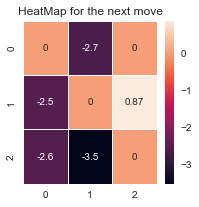

In [42]:
env.render()
plt.style.use("seaborn")

plt.figure(figsize=(3,3))
heat_map = sns.heatmap( data_heat, linewidth = 1 , annot = True)
plt.title( "HeatMap for the next move" )
plt.show()